In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage import io, color, transform
from sklearn.metrics import classification_report

In [ ]:
Categories=['noStroke','stroke']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/main'

for i in Categories:
  print(f'loading...category : {i}')
  path = os.path.join(datadir, i)
  for img in os.listdir(path):
    image = io.imread(os.path.join(path, img))
    img_gray = color.rgb2gray(image)
    img_resized = transform.resize(img_gray, (150, 150))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))

  print(f'loaded category:{i} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading...category : noStroke
loaded category:noStroke successfully
loading...category : stroke
loaded category:stroke successfully


In [ ]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target

#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
											random_state=42,
											stratify=y)


In [ ]:
# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8992042440318302


In [ ]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 89.92042440318302% accurate


In [ ]:
print(classification_report(y_test, y_pred, target_names=['noStroke', 'stroke']))


              precision    recall  f1-score   support

    noStroke       0.88      0.99      0.93       502
      stroke       0.97      0.72      0.83       252

    accuracy                           0.90       754
   macro avg       0.92      0.85      0.88       754
weighted avg       0.91      0.90      0.89       754



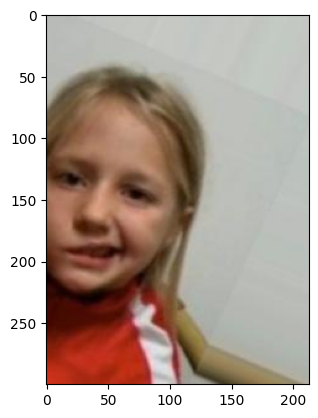

noStroke = 19.0%
stroke = 81.0%
The predicted image is : stroke


In [ ]:
path='/content/drive/MyDrive/main/stroke/aug_0_5128.jpg'
img=io.imread(path)
plt.imshow(img)
plt.show()
img_gray = color.rgb2gray(img)
img_resize=transform.resize(img_gray,(150,150))
l=[img_resize.flatten()]
probability=rf_model.predict_proba(l)
for ind,val in enumerate(Categories):
	print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[rf_model.predict(l)[0]])

In [ ]:
import joblib

In [ ]:
joblib.dump(rf_model, "/content/drive/MyDrive/rf_stroke_classification")

['/content/drive/MyDrive/rf_stroke_classification']